In [17]:
from IPython import display
import math
import pandas as pd
from pprint import pprint
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',context='talk',palette='Dark2')

# getting the headlines 

In [55]:
import praw
reddit= praw.Reddit(client_id='BQZ1ZW2s4C4vwQ',
                   client_secret='xfL6773b9mujf3LwIhQhy4ritVg',
                   user_agent='pragnachalla')
h=set()
for s in reddit.subreddit('politics').new(limit=None):
    h.add(s.title)
#     display.clear_output()
#     print(len(h))
# print(h)

#  getting the sentiment scores

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia=SIA()
results=[]
for line in h:
    ps=sia.polarity_scores(line)
    ps['headline']=line
    results.append(ps)
# pprint(results[:3],width=1000)

In [57]:
df=pd.DataFrame(results)

#  assigning the labels for sentiment

In [58]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1

#  getting +ve and -ve headlines

In [59]:
positive_headlines=df[df.label==1]
negative_headlines=df[df.label==-1]

# Distribution of +ve and -ve headlines 

In [60]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

-1    413
 0    393
 1    167
Name: label, dtype: int64
-1    42.446043
 0    40.390545
 1    17.163412
Name: label, dtype: float64


# bar chart 

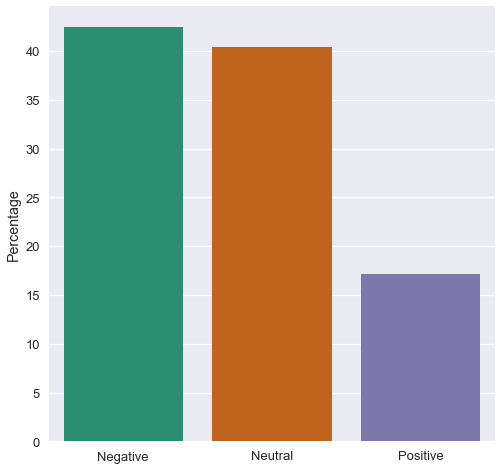

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()


# word distributions 

In [63]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [64]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [65]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 64),
 ('coronavirus', 58),
 ('supreme', 19),
 ('court', 19),
 ('pandemic', 18),
 ('wisconsin', 17),
 ('biden', 16),
 ('election', 15),
 ('new', 11),
 ('covid', 10),
 ('19', 10),
 ('help', 10),
 ('president', 10),
 ('amid', 9),
 ('says', 9),
 ('drug', 8),
 ('top', 7),
 ('navy', 7),
 ('joe', 7),
 ('tuesday', 7)]

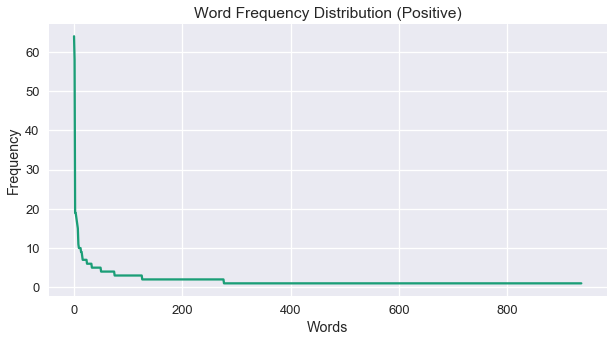

In [66]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

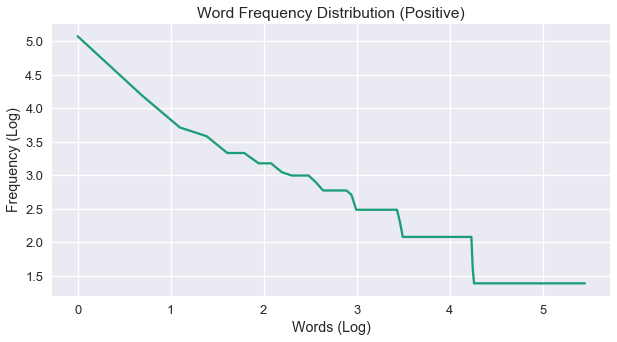

In [67]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [68]:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('coronavirus', 159),
 ('trump', 150),
 ('crisis', 42),
 ('us', 35),
 ('says', 34),
 ('wisconsin', 34),
 ('pandemic', 29),
 ('covid', 25),
 ('governor', 24),
 ('fauci', 23),
 ('u', 23),
 ('navy', 23),
 ('fired', 23),
 ('health', 21),
 ('election', 21),
 ('captain', 20),
 ('19', 19),
 ('biden', 17),
 ('white', 16),
 ('fight', 16)]

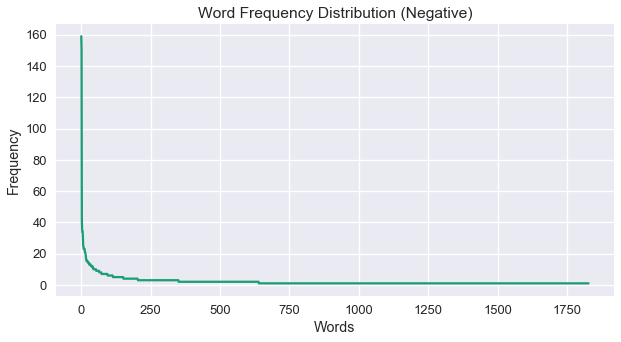

In [69]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()


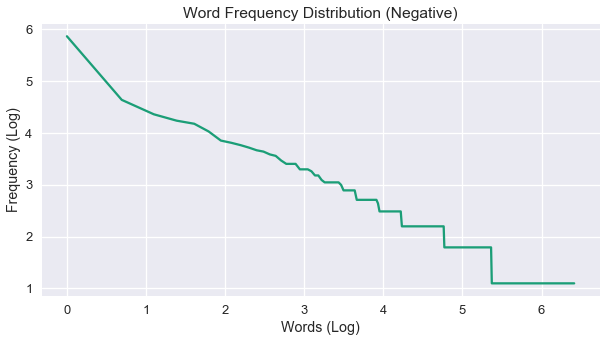

In [70]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [72]:
tokens=pos_tokens+neg_tokens
s=''
for x in tokens:
    s+=x+' '

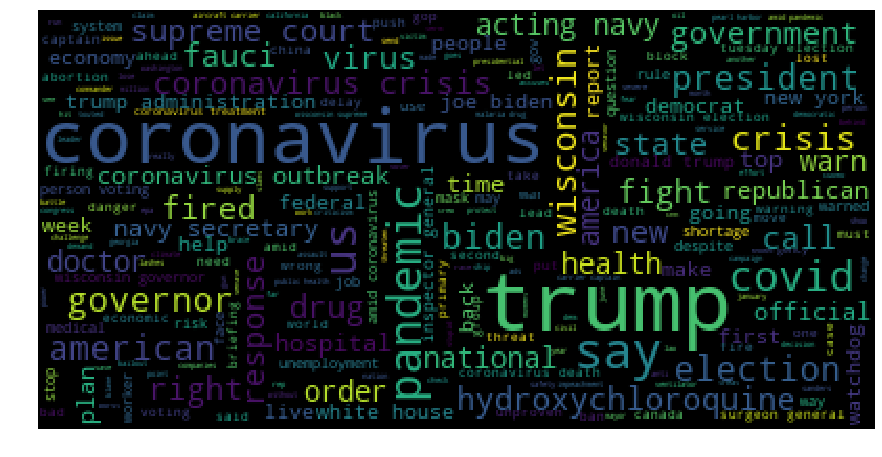

In [74]:

wc=WordCloud(background_color='black',max_words=300,max_font_size=40).generate(s)
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()